# Importing Libraries

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib as ta
# 1. Import yfinance and other necessary libraries
import yfinance as yf
import datetime
import matplotlib.dates as mdates


# Importing Data and Visualisastion

[*********************100%%**********************]  1 of 1 completed


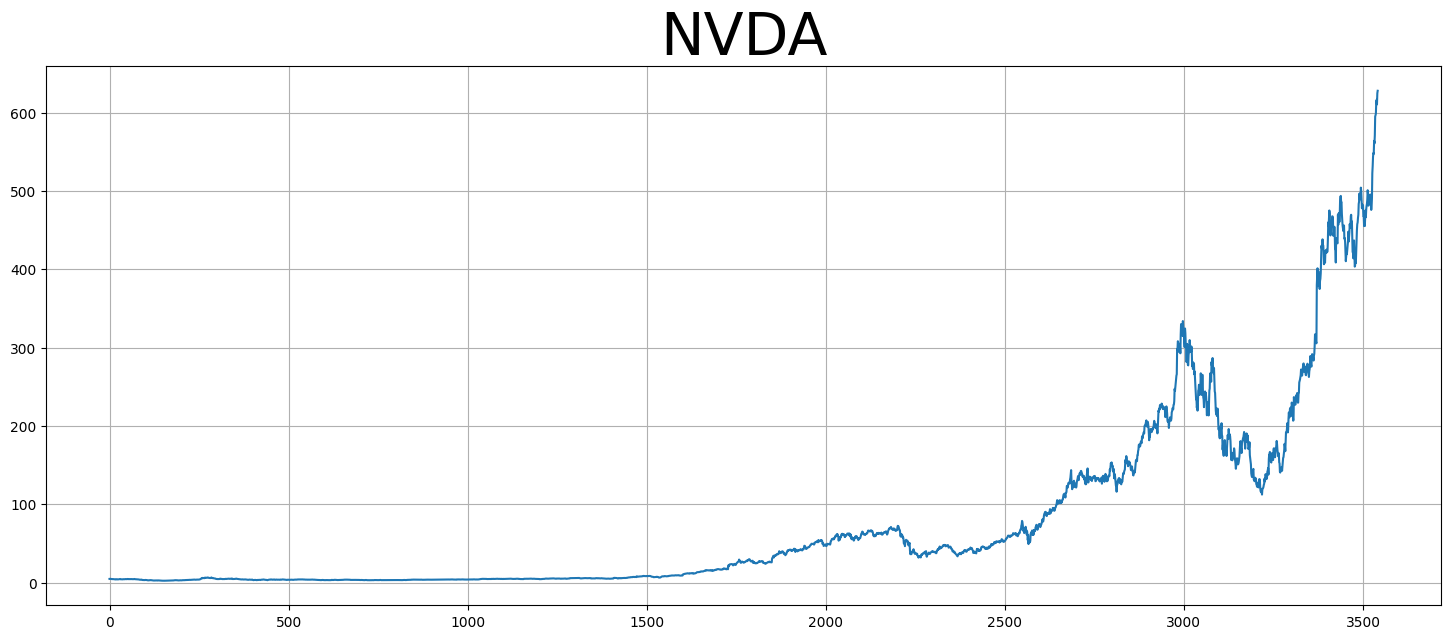

In [106]:
symb = "NVDA"
# Define today's date
end_date = datetime.datetime.now().strftime('%Y-%m-%d')

df = yf.download(symb, start="2010-01-01", end=end_date, interval="1d")
plt.figure(figsize=(18,7))
df.dropna(inplace=True)
df = df.reset_index(drop=True)
plt.plot(df['Close'] )
plt.title(symb,size=42)
plt.grid()
plt.show()

# Macd Indicator and visualisation

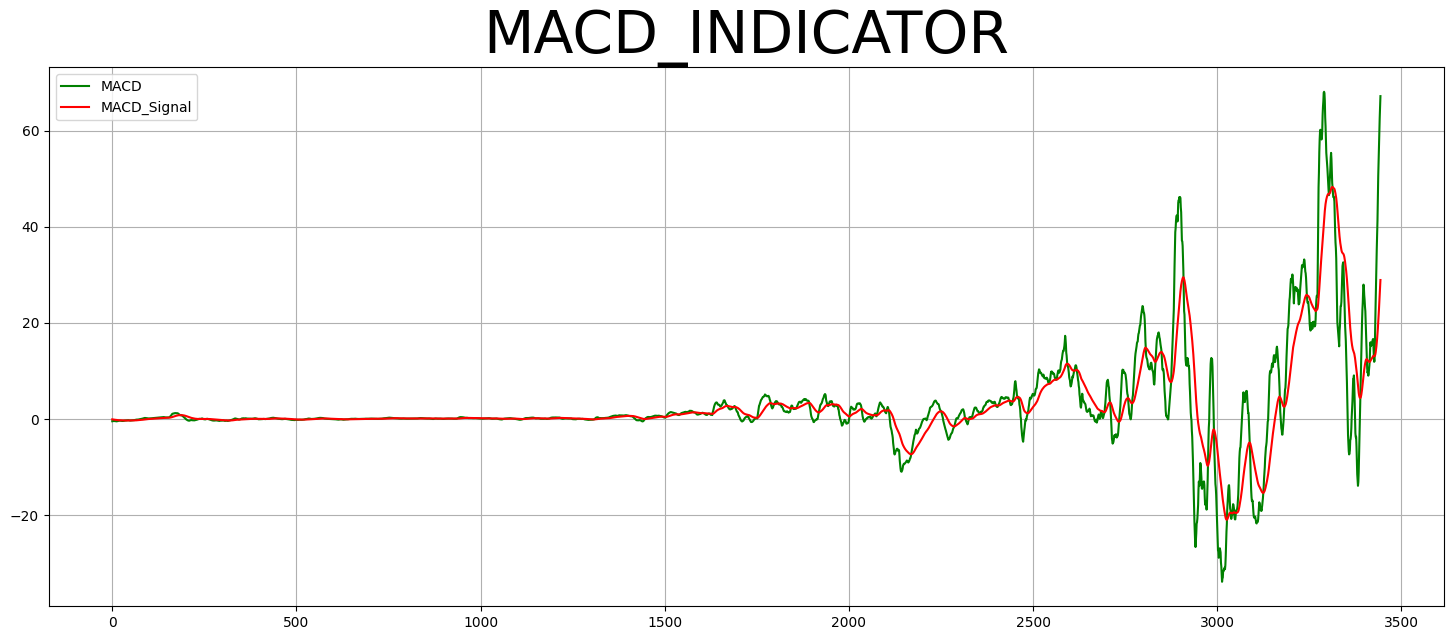

In [107]:
macd, macdsignal, macdhist = ta.MACD(df['Close'], fastperiod=12, slowperiod=50, signalperiod=50)

df['macd'] = macd
df['macd_signal'] = macdsignal
df.dropna(inplace=True)
df = df.reset_index(drop=True)
plt.figure(figsize=(18,7))
plt.plot(df['macd'],color='g',label='MACD')
plt.plot(df['macd_signal'],color='r',label='MACD_Signal')
plt.legend()
plt.title('MACD_INDICATOR',size=42)
plt.grid()
plt.show()

# Empty Arrays


In [108]:
buy=[]
sell=[]
Profit=[]
Stop_loss=[]
Close_order_sell=[]
Close_order_buy=[]
position_Buy=None
position_Sell=None

# Decision Making Process

Profit = 72
Stop_loss = 55
PROFITIBLITY 56.69291338582677


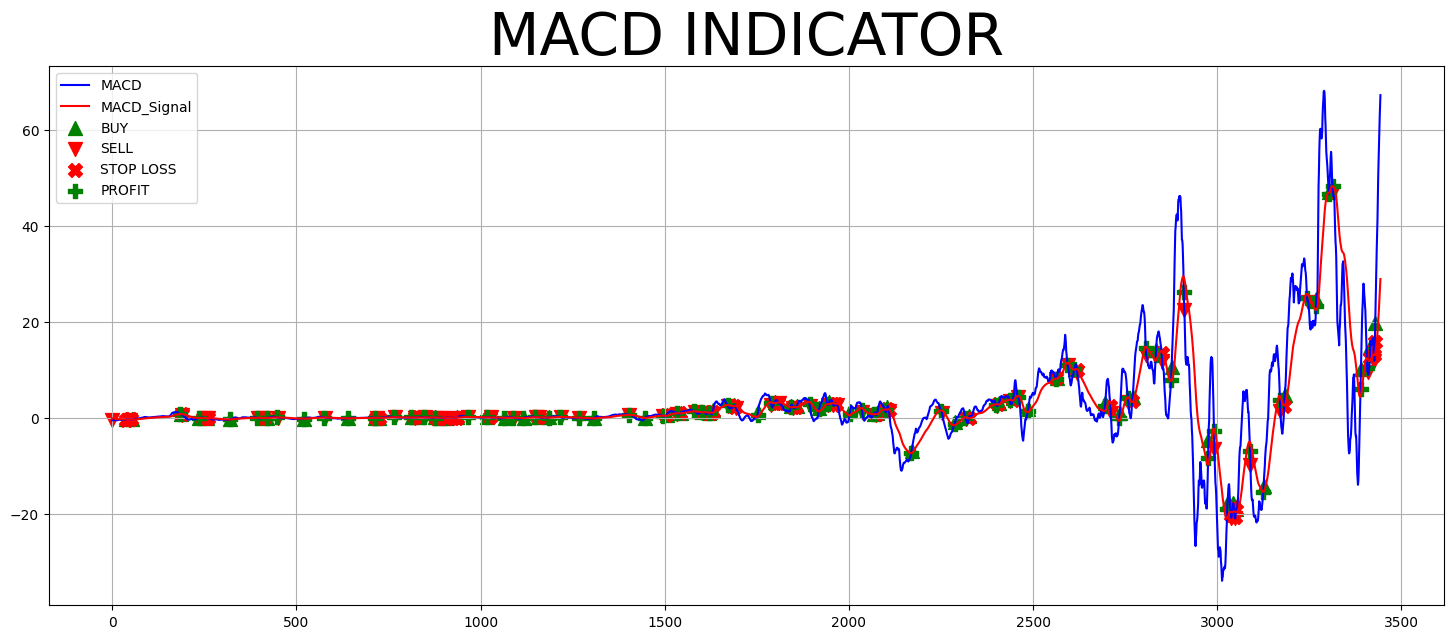

In [109]:
for i in range(len(df)):
######################################SIGNAL FOR BUY#######################################################

    if df['macd'][i] > df['macd_signal'][i] and position_Buy!="Buy" and position_Sell!="Sell"  :
        buy.append(df['macd'][i])
        sell.append(np.nan)
        Stop_loss.append(np.nan)
        Profit.append(np.nan)
        Close_order_buy.append(df['macd'][i])
        position_Buy="Buy"
            


######################################SIGNAL FOR SELL#######################################################
 
    elif df['macd'][i]<df['macd_signal'][i] and position_Sell!="Sell" and position_Buy!="Buy":
        sell.append(df['macd'][i])
        buy.append(np.nan)
        Stop_loss.append(np.nan)
        Close_order_sell.append(df['macd'][i])
        Profit.append(np.nan)
        position_Sell="Sell"
            
     

######################################SIGNAL FOR BUY_macd#######################################################
    elif position_Buy=="Buy" and df['macd'][i]<df['macd_signal'][i]:
        if df['macd'][i]>Close_order_buy[-1] :
            Stop_loss.append(np.nan)
            Profit.append(df['macd'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
            
        elif df['macd'][i]<Close_order_buy[-1] :
            Stop_loss.append(df['macd'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
######################################SIGNAL FOR SELL_macd#######################################################
    elif position_Sell=="Sell" and df['macd'][i]>df['macd_signal'][i]:
        if df['macd'][i]<Close_order_sell[-1]:
            Stop_loss.append(np.nan)
            Profit.append(df['macd'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        elif df['macd'][i]>Close_order_sell[-1]:
            Stop_loss.append(df['macd'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
    else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
           
df['buy']=buy
df['sell']=sell
df['Stop_loss']=Stop_loss
df['Profit']=Profit
plt.figure(figsize=(18,7))

plt.plot(df['macd'],color='b',label='MACD')
plt.plot(df['macd_signal'],color='r',label='MACD_Signal')
plt.scatter(df.index,df['buy'],marker='^',color='g',s=100,label='BUY')
plt.scatter(df.index,df['sell'],marker="v",color='r',s=100,label='SELL')
plt.scatter(df.index,df['Stop_loss'],marker='X',color='r',s=100,label='STOP LOSS')
plt.scatter(df.index,df['Profit'],marker='P',color='g',s=100,label='PROFIT')
plt.legend()
plt.title('MACD INDICATOR',size=42)
plt.grid()
print('Profit =',df['Profit'].count())
print('Stop_loss =',df['Stop_loss'].count())
print(f"PROFITIBLITY {(df['Profit'].count()/(df['Profit'].count()+df['Stop_loss'].count()))*100}")

In [110]:
buy=[]
sell=[]
Profit=[]
Stop_loss=[]
Close_order_sell=[]
Close_order_buy=[]
position_Buy=None
position_Sell=None

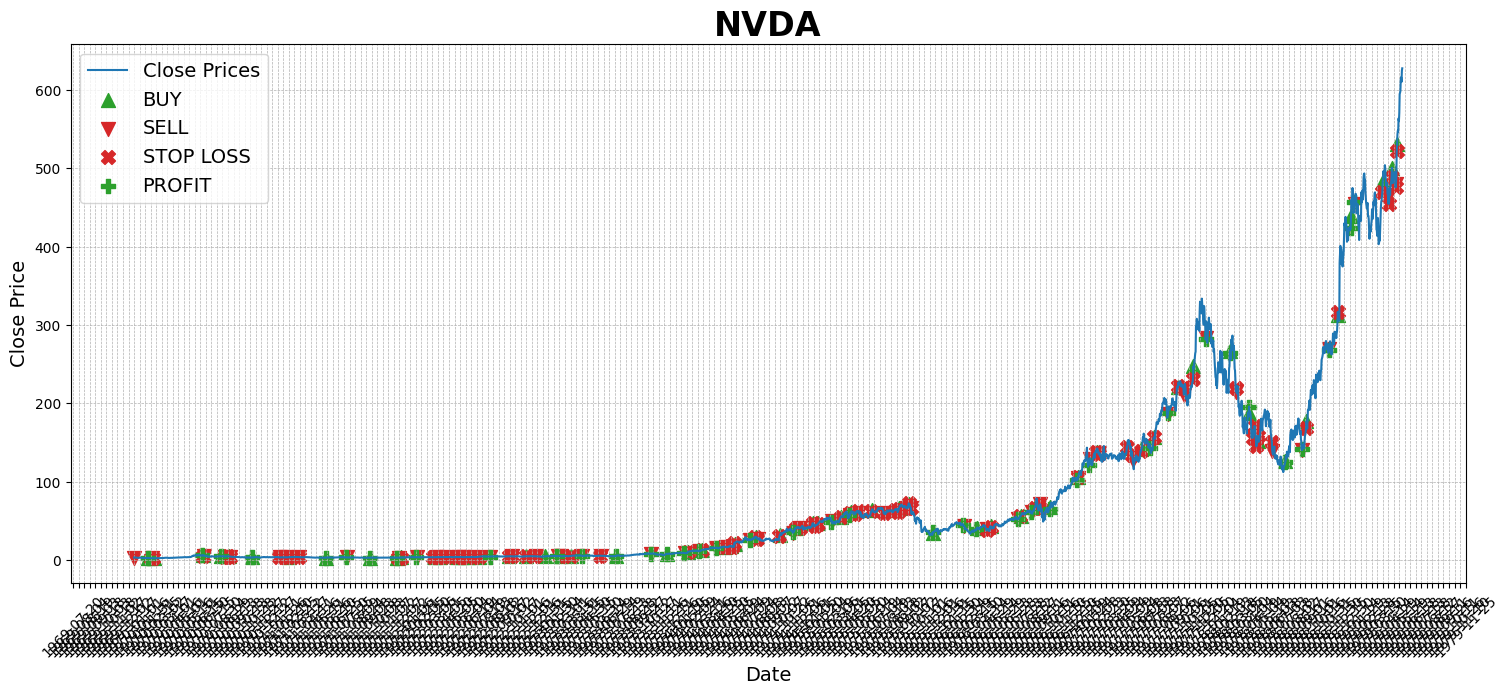

Profit = 40
Stop_loss = 86
PROFITIBLITY 31.746031746031743


In [111]:
for i in range(len(df)):
######################################SIGNAL FOR BUY#######################################################

    if df['macd'][i]>df['macd_signal'][i] and position_Buy!="Buy" and position_Sell!="Sell"  :
        buy.append(df['Close'][i])
        sell.append(np.nan)
        Stop_loss.append(np.nan)
        Profit.append(np.nan)
        Close_order_buy.append(df['Close'][i])
        position_Buy="Buy"
            


######################################SIGNAL FOR SELL#######################################################
 
    elif df['macd'][i] <df['macd_signal'][i] and position_Sell!="Sell" and position_Buy!="Buy":
        sell.append(df['Close'][i])
        buy.append(np.nan)
        Stop_loss.append(np.nan)
        Close_order_sell.append(df['Close'][i])
        Profit.append(np.nan)
        position_Sell="Sell"
            
     

######################################SIGNAL FOR BUY_macd#######################################################
    elif position_Buy=="Buy" and df['macd'][i] < df['macd_signal'][i]:
        if df['Close'][i]>Close_order_buy[-1] :
            Stop_loss.append(np.nan)
            Profit.append(df['Close'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
            
        elif df['Close'][i]<Close_order_buy[-1] :
            Stop_loss.append(df['Close'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
            position_Buy=None
######################################SIGNAL FOR SELL_macd#######################################################
    elif position_Sell=="Sell" and df['macd'][i]>df['macd_signal'][i]:
        if df['Close'][i]<Close_order_sell[-1]:
            Stop_loss.append(np.nan)
            Profit.append(df['Close'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        elif df['Close'][i]>Close_order_sell[-1]:
            Stop_loss.append(df['Close'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
            position_Sell=None
    else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
           
df['buy']=buy
df['sell']=sell
df['Stop_loss']=Stop_loss
df['Profit']=Profit
plt.figure(figsize=(18,7))

# Plotting the Close prices with a professional color
plt.plot(df['Close'], label='Close Prices', color='#1f77b4')  # A more professional blue color

# Scatter plots for Buy, Sell, Stop Loss, and Profit signals with refined colors
plt.scatter(df.index, df['buy'], marker='^', color='#2ca02c', s=100, label='BUY')  # Darker green
plt.scatter(df.index, df['sell'], marker='v', color='#d62728', s=100, label='SELL')  # Darker red
plt.scatter(df.index, df['Stop_loss'], marker='X', color='#d62728', s=100, label='STOP LOSS')  # Same as SELL
plt.scatter(df.index, df['Profit'], marker='P', color='#2ca02c', s=100, label='PROFIT')  # Same as BUY

# Enhancing legend and title
plt.legend(loc='upper left', fontsize=14)
plt.title(symb, fontsize=24, fontweight='bold')

# Improving grid and axes
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price', fontsize=14)

# Format the x-axis to display dates (if applicable)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))  # Adjust interval as needed
plt.xticks(rotation=45)
plt.show()

print('Profit =',df['Profit'].count())
print('Stop_loss =',df['Stop_loss'].count())
print(f"PROFITIBLITY {(df['Profit'].count()/(df['Profit'].count()+df['Stop_loss'].count()))*100}")

In [112]:
# NSE
df = pd.read_csv('C:\\Users\\Daniel aghanya\\Pictures\\tiktok download\\Final_Year_Project-main\\Uni project\\NSE All Share Historical Data.csv')
df.dropna(inplace=True)
df = df.iloc[::-1].reset_index(drop=True)
# Converting 'Price', 'High', and 'Low' columns to float
df['Price'] = df['Price'].str.replace(',', '').astype(float)
df['High'] = df['High'].str.replace(',', '').astype(float)
df['Low'] = df['Low'].str.replace(',', '').astype(float)
df['Close'] = df['Price']  # Assuming 'Close' is same as 'Price'

df.head()

,Date,Price,Open,High,Low,Vol.,Change %,Close
0,23/09/2015,30543.17,"30,426.78",30560.93,30425.31,466.94M,0.38%,30543.17
1,30/08/2016,27493.12,"27,368.41",27517.13,27364.18,230.13M,0.46%,27493.12
2,31/08/2016,27599.03,"27,493.12",27612.13,27487.20,262.61M,0.39%,27599.03
3,01/09/2016,28419.92,"27,599.03",28421.27,27599.03,229.23M,2.97%,28419.92
4,02/09/2016,27756.67,"28,419.92",28488.00,27744.76,309.45M,-2.33%,27756.67


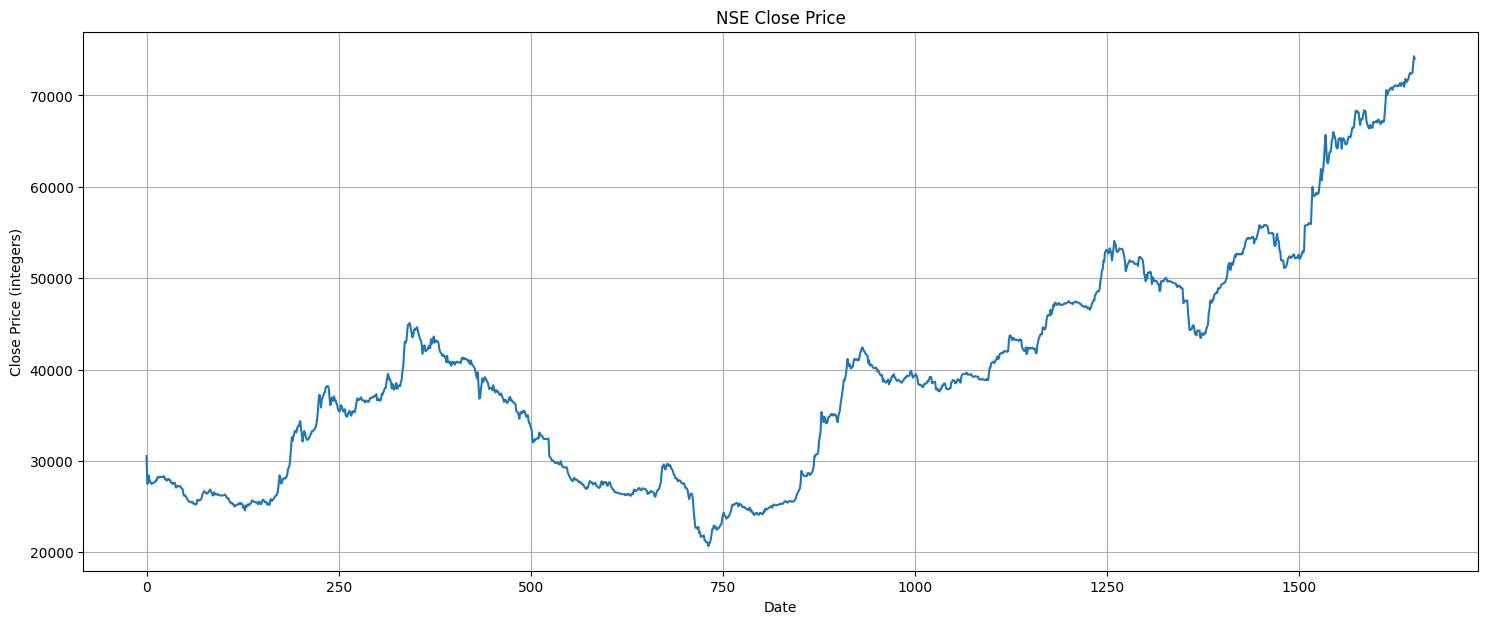

In [113]:
# Plot the Close price
plt.figure(figsize=(18,7))
plt.plot(df['Close'])
plt.title('NSE Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price (integers)')
plt.grid()
plt.show()

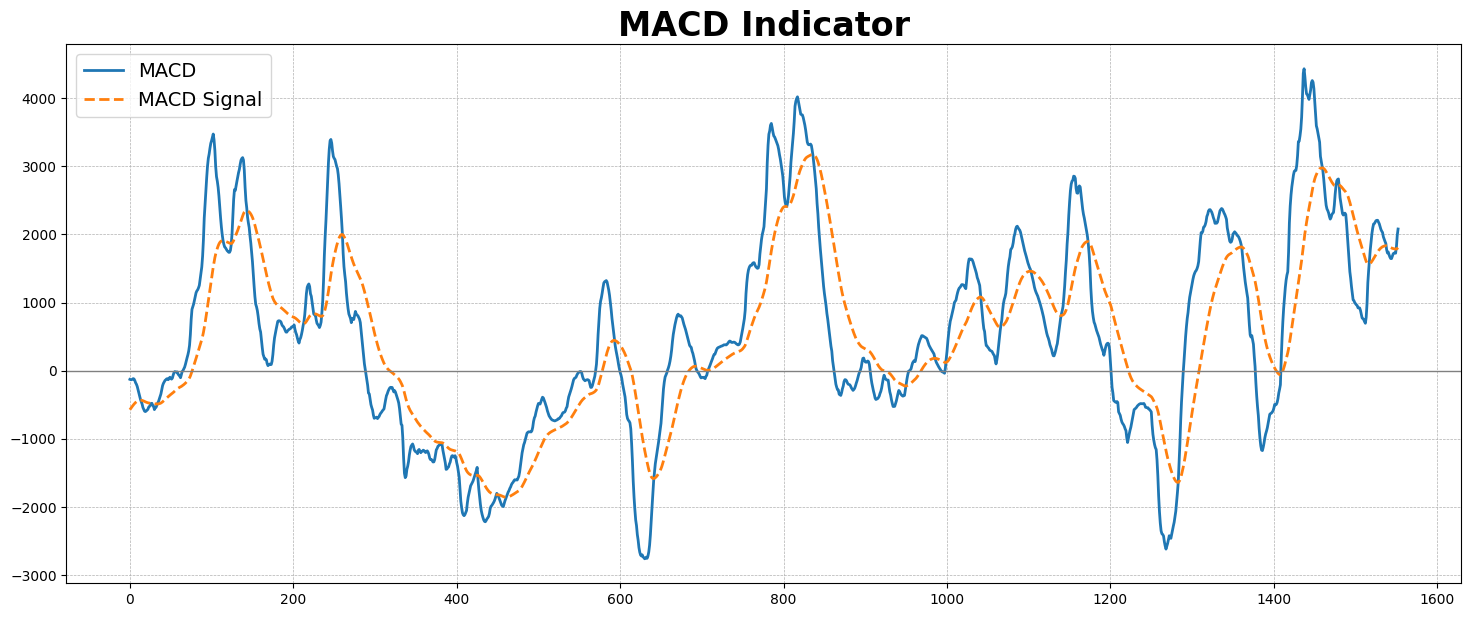

In [114]:
macd, macdsignal, macdhist = ta.MACD(df['Close'], fastperiod=12, slowperiod=50, signalperiod=50)

df['macd'] = macd
df['macd_signal'] = macdsignal
df.dropna(inplace=True)
df = df.reset_index(drop=True)
plt.figure(figsize=(18,7))
# Plotting the MACD and signal lines with enhanced style
plt.plot(df['macd'], color='#1f77b4', label='MACD', linewidth=2)  # A more professional blue color
plt.plot(df['macd_signal'], color='#ff7f0e', label='MACD Signal', linewidth=2, linestyle='--')  # Orange color with dashed line

# Adding a zero line for reference
plt.axhline(y=0, color='gray', linestyle='-', linewidth=1)

# Enhancing legend and title
plt.legend(loc='upper left', fontsize=14)
plt.title('MACD Indicator', fontsize=24, fontweight='bold')

# Improving grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

In [115]:
buy=[]
sell=[]
Profit=[]
Stop_loss=[]
Close_order_sell=[]
Close_order_buy=[]
position_Buy=None
position_Sell=None
df = df.reset_index(drop=True)

In [116]:
for i in range(len(df)):
######################################SIGNAL FOR BUY#######################################################

    if df['macd'][i] > df['macd_signal'][i] and position_Buy!="Buy" and position_Sell!="Sell"  :
        buy.append(df['macd'][i])
        sell.append(np.nan)
        Stop_loss.append(np.nan)
        Profit.append(np.nan)
        Close_order_buy.append(df['macd'][i])
        position_Buy="Buy"
            


######################################SIGNAL FOR SELL#######################################################
 
    elif df['macd'][i]<df['macd_signal'][i] and position_Sell!="Sell" and position_Buy!="Buy":
        sell.append(df['macd'][i])
        buy.append(np.nan)
        Stop_loss.append(np.nan)
        Close_order_sell.append(df['macd'][i])
        Profit.append(np.nan)
        position_Sell="Sell"
            
     

######################################SIGNAL FOR BUY_macd#######################################################
    elif position_Buy=="Buy" and df['macd'][i]<df['macd_signal'][i]:
        if df['macd'][i]>Close_order_buy[-1] :
            Stop_loss.append(np.nan)
            Profit.append(df['macd'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
            
        elif df['macd'][i]<Close_order_buy[-1] :
            Stop_loss.append(df['macd'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
######################################SIGNAL FOR SELL_macd#######################################################
    elif position_Sell=="Sell" and df['macd'][i]>df['macd_signal'][i]:
        if df['macd'][i]<Close_order_sell[-1]:
            Stop_loss.append(np.nan)
            Profit.append(df['macd'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        elif df['macd'][i]>Close_order_sell[-1]:
            Stop_loss.append(df['macd'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
    else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
           
df['buy']=buy
df['sell']=sell
df['Stop_loss']=Stop_loss
df['Profit']=Profit

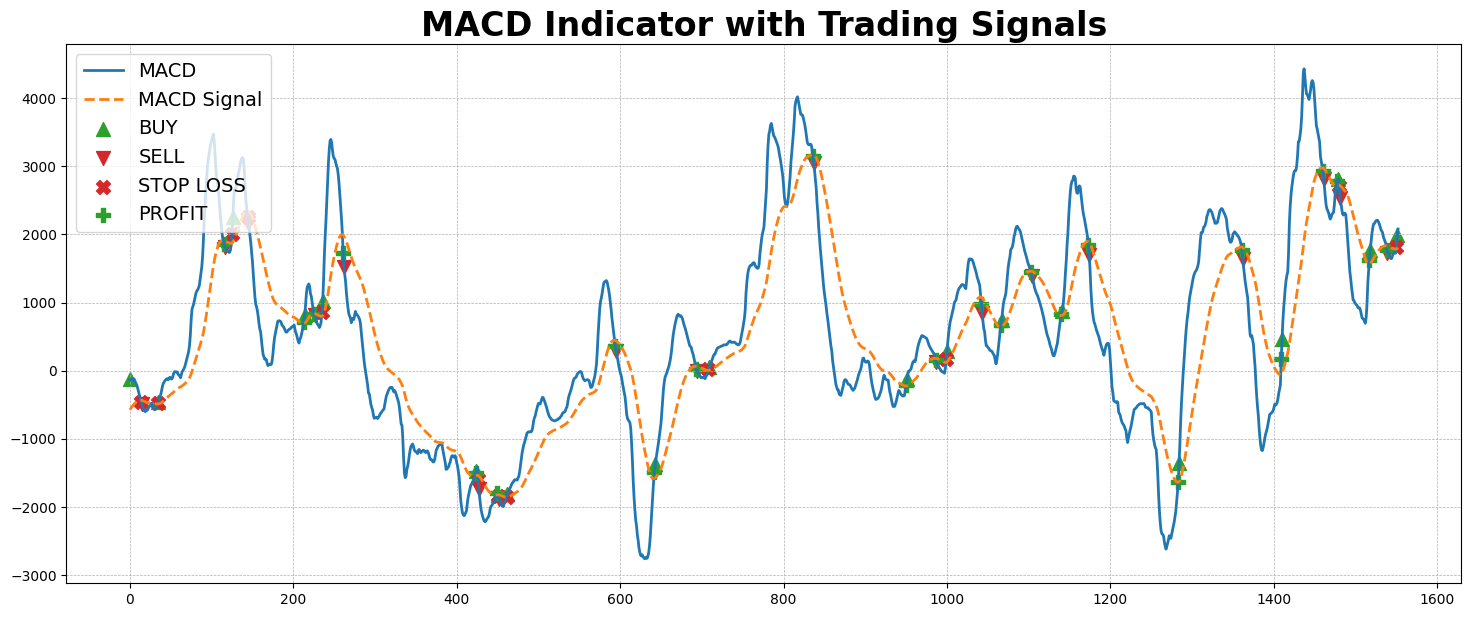

In [117]:
plt.figure(figsize=(18, 7))

# Plotting the MACD and signal lines with a professional color scheme
plt.plot(df['macd'], color='#1f77b4', label='MACD', linewidth=2)  # A more professional blue color
plt.plot(df['macd_signal'], color='#ff7f0e', label='MACD Signal', linewidth=2, linestyle='--')  # Orange color with dashed line

# Scatter plots for Buy, Sell, Stop Loss, and Profit signals with refined colors
plt.scatter(df.index, df['buy'], marker='^', color='#2ca02c', s=100, label='BUY')  # Darker green
plt.scatter(df.index, df['sell'], marker='v', color='#d62728', s=100, label='SELL')  # Darker red
plt.scatter(df.index, df['Stop_loss'], marker='X', color='#d62728', s=100, label='STOP LOSS')  # Same as SELL
plt.scatter(df.index, df['Profit'], marker='P', color='#2ca02c', s=100, label='PROFIT')  # Same as BUY

# Enhancing legend and title
plt.legend(loc='upper left', fontsize=14)
plt.title('MACD Indicator with Trading Signals', fontsize=24, fontweight='bold')

# Improving grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [118]:
buy=[]
sell=[]
Profit=[]
Stop_loss=[]
Close_order_sell=[]
Close_order_buy=[]
position_Buy=None
position_Sell=None

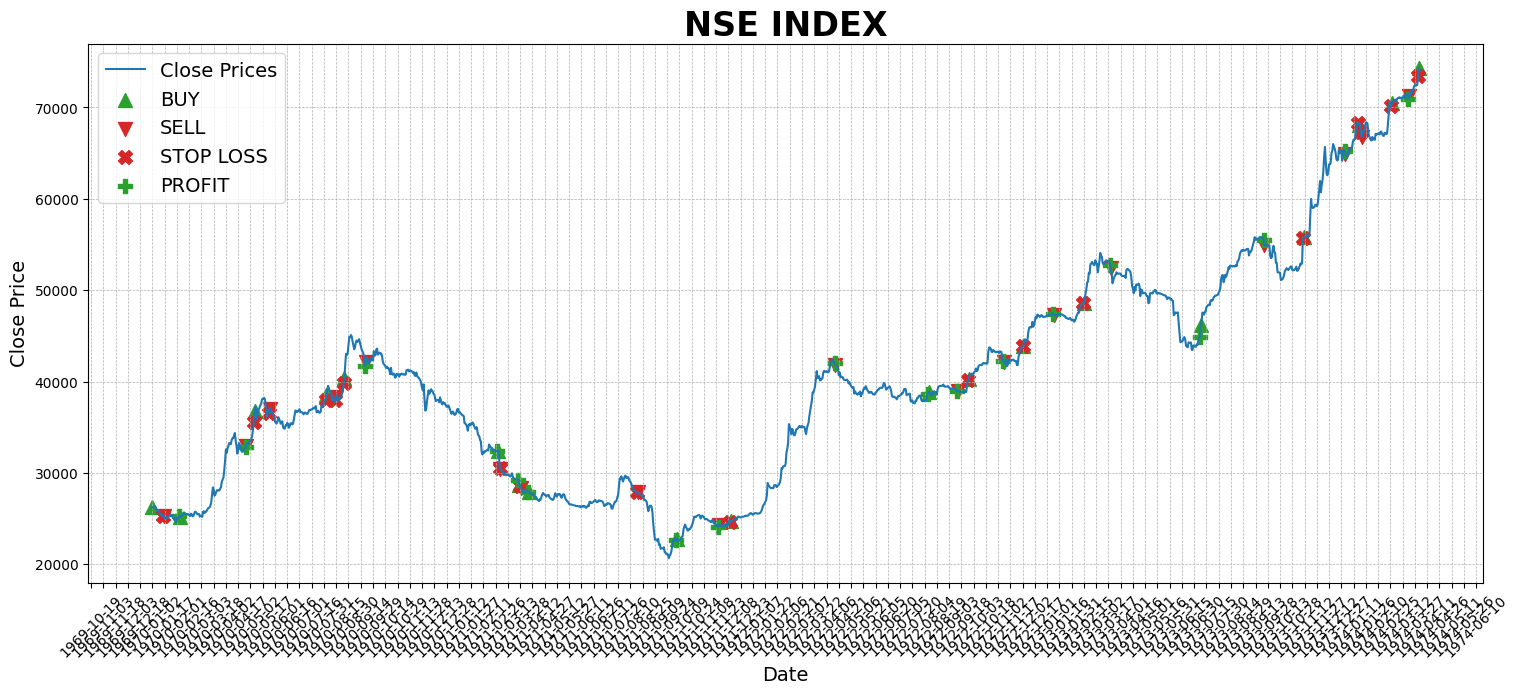

Profit = 18
Stop_loss = 18
PROFITIBLITY 50.0


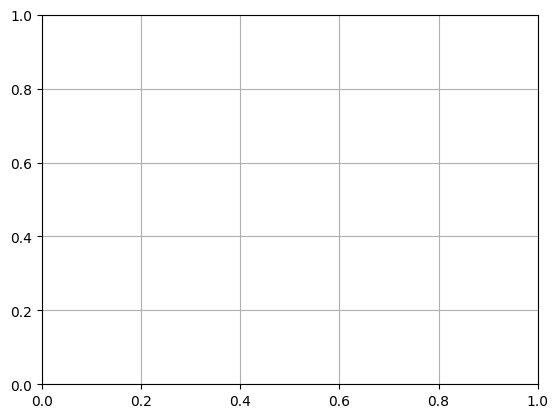

In [119]:
for i in range(len(df)):
######################################SIGNAL FOR BUY#######################################################

    if df['macd'][i]>df['macd_signal'][i] and position_Buy!="Buy" and position_Sell!="Sell"  :
        buy.append(df['Close'][i])
        sell.append(np.nan)
        Stop_loss.append(np.nan)
        Profit.append(np.nan)
        Close_order_buy.append(df['Close'][i])
        position_Buy="Buy"
            


######################################SIGNAL FOR SELL#######################################################
 
    elif df['macd'][i] <df['macd_signal'][i] and position_Sell!="Sell" and position_Buy!="Buy":
        sell.append(df['Close'][i])
        buy.append(np.nan)
        Stop_loss.append(np.nan)
        Close_order_sell.append(df['Close'][i])
        Profit.append(np.nan)
        position_Sell="Sell"
            
     

######################################SIGNAL FOR BUY_macd#######################################################
    elif position_Buy=="Buy" and df['macd'][i] < df['macd_signal'][i]:
        if df['Close'][i]>Close_order_buy[-1] :
            Stop_loss.append(np.nan)
            Profit.append(df['Close'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
            
        elif df['Close'][i]<Close_order_buy[-1] :
            Stop_loss.append(df['Close'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Buy=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
            position_Buy=None
######################################SIGNAL FOR SELL_macd#######################################################
    elif position_Sell=="Sell" and df['macd'][i]>df['macd_signal'][i]:
        if df['Close'][i]<Close_order_sell[-1]:
            Stop_loss.append(np.nan)
            Profit.append(df['Close'][i])
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        elif df['Close'][i]>Close_order_sell[-1]:
            Stop_loss.append(df['Close'][i])
            Profit.append(np.nan)
            buy.append(np.nan)
            sell.append(np.nan)
            position_Sell=None
            
        else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
            position_Sell=None
    else:
            buy.append(np.nan)
            sell.append(np.nan)
            Stop_loss.append(np.nan)
            Profit.append(np.nan)
           
df['buy']=buy
df['sell']=sell
df['Stop_loss']=Stop_loss
df['Profit']=Profit
plt.figure(figsize=(18,7))

# Plotting the Close prices with a professional color
plt.plot(df['Close'], label='Close Prices', color='#1f77b4')  # A more professional blue color

# Scatter plots for Buy, Sell, Stop Loss, and Profit signals with refined colors
plt.scatter(df.index, df['buy'], marker='^', color='#2ca02c', s=100, label='BUY')  # Darker green
plt.scatter(df.index, df['sell'], marker='v', color='#d62728', s=100, label='SELL')  # Darker red
plt.scatter(df.index, df['Stop_loss'], marker='X', color='#d62728', s=100, label='STOP LOSS')  # Same as SELL
plt.scatter(df.index, df['Profit'], marker='P', color='#2ca02c', s=100, label='PROFIT')  # Same as BUY

# Enhancing legend and title
plt.legend(loc='upper left', fontsize=14)
plt.title('NSE INDEX', fontsize=24, fontweight='bold')

# Improving grid and axes
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price', fontsize=14)

# Format the x-axis to display dates (if applicable)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))  # Adjust interval as needed
plt.xticks(rotation=45)
plt.show()

plt.grid()
print('Profit =',df['Profit'].count())
print('Stop_loss =',df['Stop_loss'].count())
print(f"PROFITIBLITY {(df['Profit'].count()/(df['Profit'].count()+df['Stop_loss'].count()))*100}")